In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv(r'D:\pubg data\train_V2.csv',header=0,encoding='gbk')
print(data.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [2]:
data=data.dropna(axis=0,subset = ['winPlacePerc'])#delete the empty value

In [4]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# 1.EDA

### 1.1 Assistive features

<Figure size 648x504 with 0 Axes>

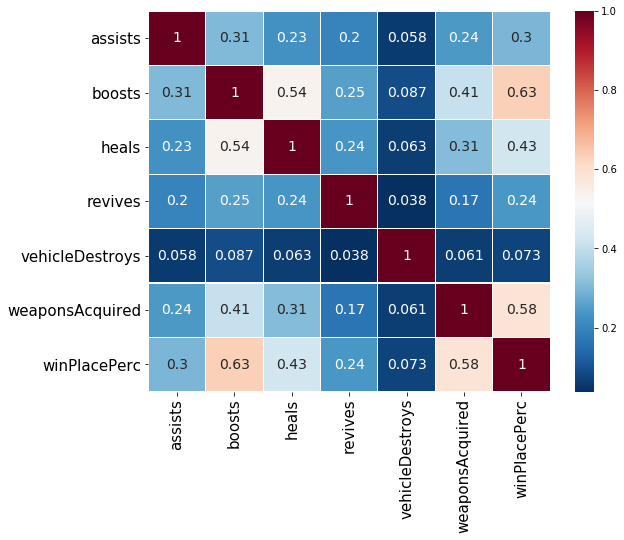

In [11]:
#Assistive features
correlation_features=["assists","boosts","heals","revives","vehicleDestroys","weaponsAcquired","winPlacePerc"]
correlation_between_features = data[correlation_features].corr()
plt.figure(figsize=(9,7))
f,ax=plt.subplots(figsize = (9, 7))
sns.heatmap(
    correlation_between_features,
    annot=True,
    annot_kws={'size': 14},
    xticklabels=correlation_between_features.columns.values,
    yticklabels=correlation_between_features.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu_r"
)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)
plt.show()


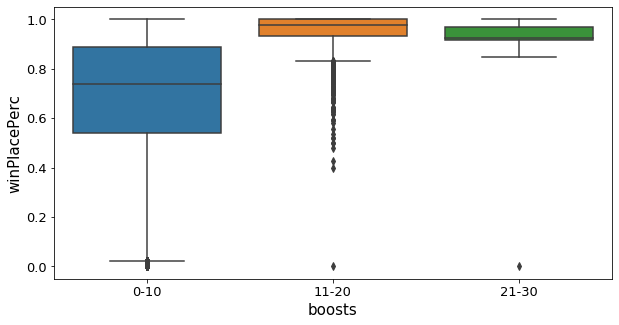

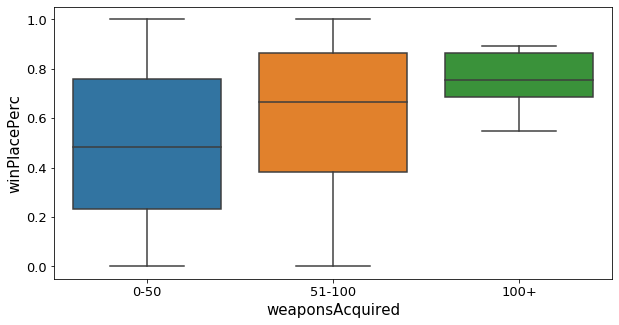

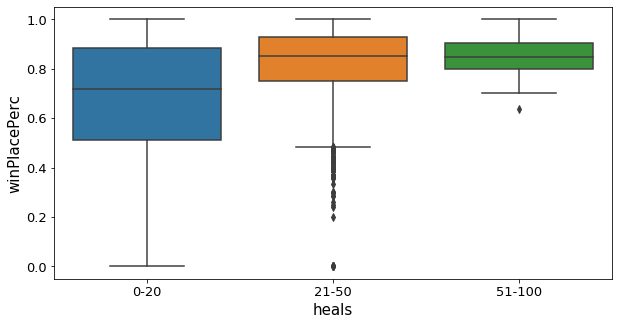

In [27]:
#Distribution and outliers of important assistive features(boosts+weaponsAcquired+heals)
boosts =data.copy()
boosts['boosts'] = pd.cut(boosts['boosts'], [0, 10, 20, 30], labels=['0-10', '11-20', '21-30'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="boosts", y="winPlacePerc", data=boosts)
ax.set_xlabel('boosts',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()
weapons =data.copy()
weapons['weaponsAcquired'] = pd.cut(weapons['weaponsAcquired'], [0, 50, 100, 500], labels=['0-50', '51-100', '100+'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="weaponsAcquired", y="winPlacePerc", data=weapons)
ax.set_xlabel('weaponsAcquired',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()
heals =data.copy()
heals['heals'] = pd.cut(heals['heals'], [0, 20, 50, 100], labels=['0-20', '21-50', '51-100'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="heals", y="winPlacePerc", data=heals)
ax.set_xlabel('heals',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()

### 1.2 Kill-related features

<Figure size 648x504 with 0 Axes>

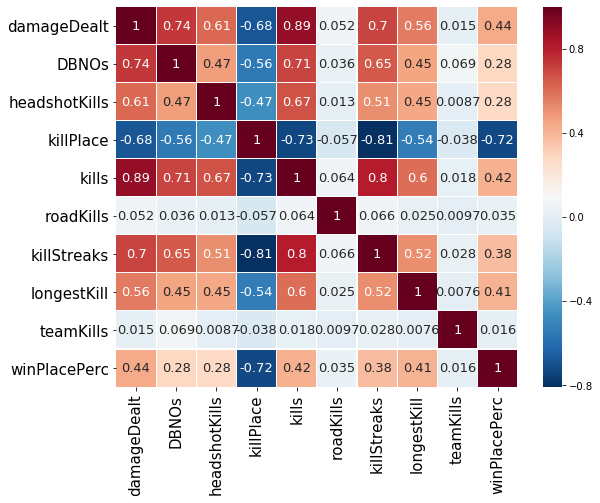

In [15]:
#Kill-related features
correlation_features=["damageDealt","DBNOs","headshotKills","killPlace","kills","roadKills","killStreaks","longestKill","teamKills","winPlacePerc"]
correlation_between_features = data[correlation_features].corr()
plt.figure(figsize=(9,7))
f,ax=plt.subplots(figsize = (9, 7))
sns.heatmap(
    correlation_between_features,
    annot=True,
    annot_kws={'size': 13},
    xticklabels=correlation_between_features.columns.values,
    yticklabels=correlation_between_features.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu_r"
)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)
plt.show()

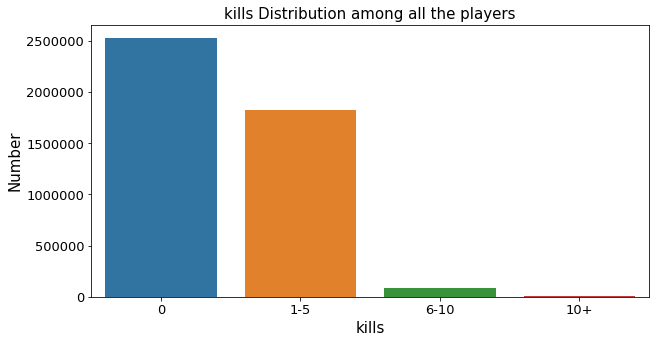

Among all the winners(winPlacePerc=1):
13.0639% players have won with 0 kill.
64.5395% players have won with 1-5 kills.
19.1694% players have won with 6-10 kills.
3.2272% players have won with more than 10 kills.


In [50]:
#Overall kills distribution  and its distribution among winners.
kills_num=data.copy()
f,ax=plt.subplots(figsize=(10,5))
kills_num['kills'] = pd.cut(kills_num['kills'], [-1,0,5,10,70], labels=['0', '1-5', '6-10','10+'])
plt.title("kills Distribution among all the players",fontsize=15)
sns.countplot(kills_num['kills'].astype('str').sort_values(), order=['0', '1-5', '6-10','10+'])
ax.set_xlabel('kills',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('Number',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
plt.show()
no_kill=data[data['kills']==0].copy()
winner=data[data['winPlacePerc']==1]
print('\033[1m'+"Among all the winners(winPlacePerc=1):")
print("{:.4f}% players have won with 0 kill.".format(100*len(no_kill[no_kill['winPlacePerc']==1])/len(winner)))
low_kill=data[(data["kills"]>0) & (data["kills"]<6)].copy()
print("{:.4f}% players have won with 1-5 kills.".format(100*len(low_kill[low_kill['winPlacePerc']==1])/len(winner)))
high_kill=data[(data["kills"]>5) & (data["kills"]<11)].copy()
print("{:.4f}% players have won with 6-10 kills.".format(100*len(high_kill[high_kill['winPlacePerc']==1])/len(winner)))
killer=data[data['kills']>10].copy()
print("{:.4f}% players have won with more than 10 kills.".format(100*len(killer[killer['winPlacePerc']==1])/len(winner)))


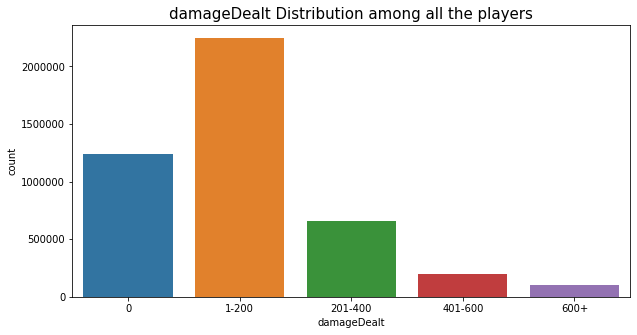

Among all the winners(winPlacePerc=1):
3.7390% players have won with 0 damagedealt.
24.6808% players have won with 1-200 damagedealts.
28.3210% players have won with 201-400 damagedealts.
20.6337% players have won with 401-600 damagedealts.
22.9422% players have won with more than 600 damagedealts.


In [51]:
#Overall damage distribution  and its distribution among winners.
damage_num=data.copy()
plt.figure(figsize=(10,5))
plt.title("damageDealt Distribution among all the players",fontsize=15)
damage_num['damageDealt'] = pd.cut(damage_num['damageDealt'], [-1,0,200,400,600,7000], labels=['0','1-200','201-400', '401-600','600+'])
sns.countplot(damage_num['damageDealt'].astype('str').sort_values(), order=['0','1-200','201-400', '401-600','600+'])
plt.show()
no_damage=data[data['damageDealt']==0].copy()
print('\033[1m'+"Among all the winners(winPlacePerc=1):")
print("{:.4f}% players have won with 0 damagedealt.".format(100*len(no_damage[no_damage['winPlacePerc']==1])/len(winner)))
low_damage=data[(data["damageDealt"]>0) & (data["damageDealt"]<201)].copy()
print("{:.4f}% players have won with 1-200 damagedealts.".format(100*len(low_damage[low_damage['winPlacePerc']==1])/len(winner)))
high_damage=data[(data["damageDealt"]>200) & (data["damageDealt"]<401)].copy()
print("{:.4f}% players have won with 201-400 damagedealts.".format(100*len(high_damage[high_damage['winPlacePerc']==1])/len(winner)))
higher_damage=data[(data["damageDealt"]>400) & (data["damageDealt"]<601)].copy()
print("{:.4f}% players have won with 401-600 damagedealts.".format(100*len(higher_damage[higher_damage['winPlacePerc']==1])/len(winner)))
damager=data[data['damageDealt']>600].copy()
print("{:.4f}% players have won with more than 600 damagedealts.".format(100*len(damager[damager['winPlacePerc']==1])/len(winner)))

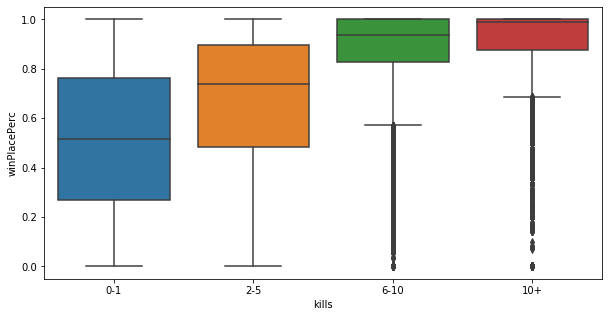

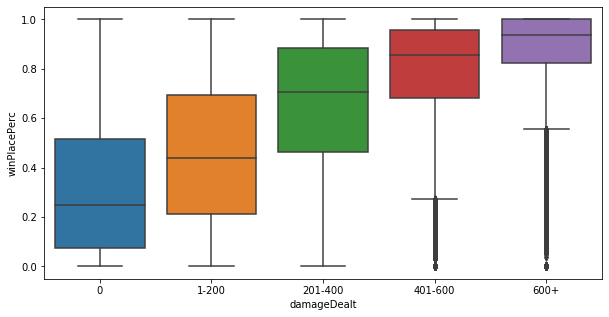

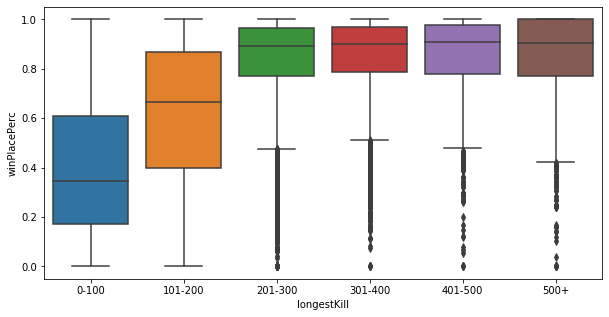

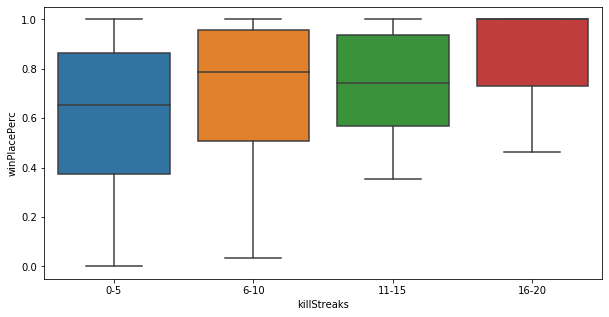

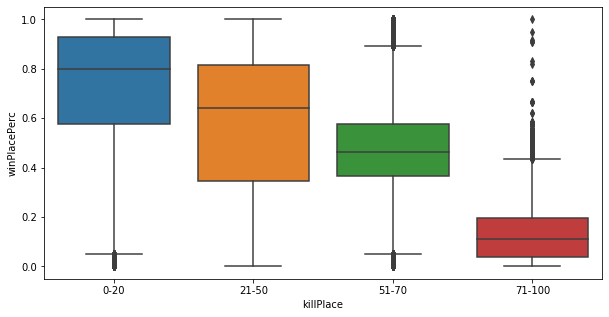

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [49]:
#Distribution  and outliers of important kills features(kills+damageDealt+longestkill+killstreaks+killPlace)
kills =data.copy()
kills['kills'] = pd.cut(kills['kills'], [0,1,5,10,70], labels=['0-1', '2-5', '6-10','10+'])
plt.figure(figsize=(10,5))
sns.boxplot(x="kills", y="winPlacePerc", data=kills)
plt.show()
kills['damageDealt'] = pd.cut(kills['damageDealt'], [-1,0,200,400,600,7000], labels=['0','1-200','201-400', '401-600','600+'])
plt.figure(figsize=(10,5))
sns.boxplot(x="damageDealt", y="winPlacePerc", data=kills)
plt.show()
kills['longestKill'] = pd.cut(kills['longestKill'], [0, 5, 200,300,400,500,7000], labels=['0-100', '101-200', '201-300', '301-400', '401-500','500+'])
plt.figure(figsize=(10,5))
sns.boxplot(x="longestKill", y="winPlacePerc", data=kills)
plt.show()
kills['killStreaks'] = pd.cut(kills['killStreaks'], [0,5,10,15,20], labels=['0-5', '6-10', '11-15', '16-20'])
plt.figure(figsize=(10,5))
sns.boxplot(x="killStreaks", y="winPlacePerc", data=kills)
plt.show()
kills['killPlace'] = pd.cut(kills['killPlace'], [0,20,50,70,100], labels=['0-20', '21-50', '51-70', '71-100'])
plt.figure(figsize=(10,5))
sns.boxplot(x="killPlace", y="winPlacePerc", data=kills)
plt.show()
plt.figure(figsize=(10,5))


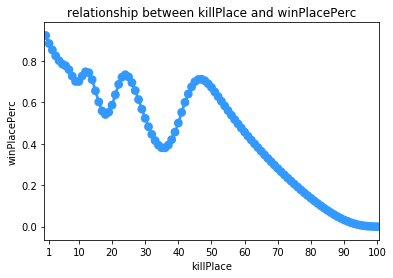

In [10]:
sns.pointplot(x='killPlace',y='winPlacePerc',data=data,color='#3399FF',alpha=0.8 )
plt.title('relationship between killPlace and winPlacePerc')
ax = plt.axes() 
ax.set_xticks([1, 10, 20, 30, 40,50,60,70,80,90,100])
ax.set_xticklabels(['1', '10', '20', '30', '40','50', '60', '70', '80', '90','100'])
plt.show()

### 1.3 Distance features

<Figure size 648x504 with 0 Axes>

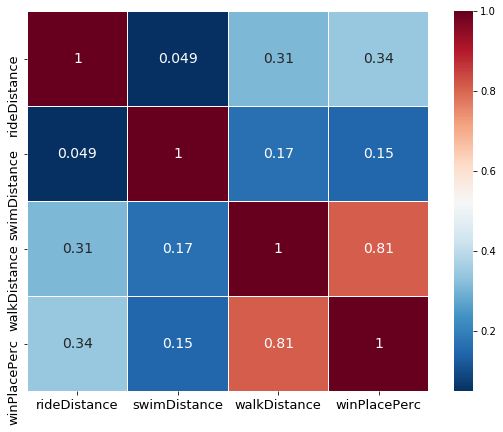

In [19]:
#Distance features
correlation_features=["rideDistance","swimDistance","walkDistance","winPlacePerc"]
correlation_between_features = data[correlation_features].corr()
plt.figure(figsize=(9,7))
f,ax=plt.subplots(figsize = (9, 7))
sns.heatmap(
    correlation_between_features,
    annot=True,
    annot_kws={'size': 14},
    xticklabels=correlation_between_features.columns.values,
    yticklabels=correlation_between_features.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu_r"
)
ax.tick_params(axis='y',labelsize=13)
ax.tick_params(axis='x',labelsize=13)
plt.show()

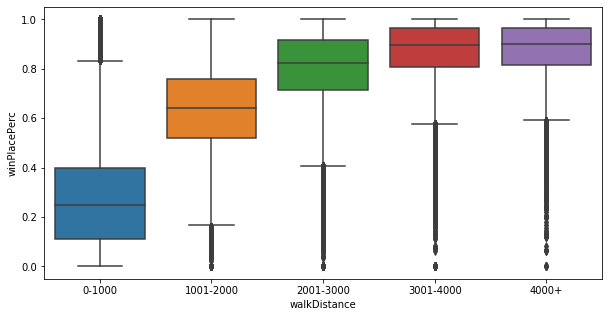

In [23]:
#Distribution of walkdistance
distance=data.copy()
distance['walkDistance'] = pd.cut(distance['walkDistance'], [0,1000,2000,3000,4000,10000], labels=['0-1000', '1001-2000', '2001-3000', '3001-4000','4000+'])
plt.figure(figsize=(10,5))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=distance)
plt.show()

### 1.4 Point features

<Figure size 648x504 with 0 Axes>

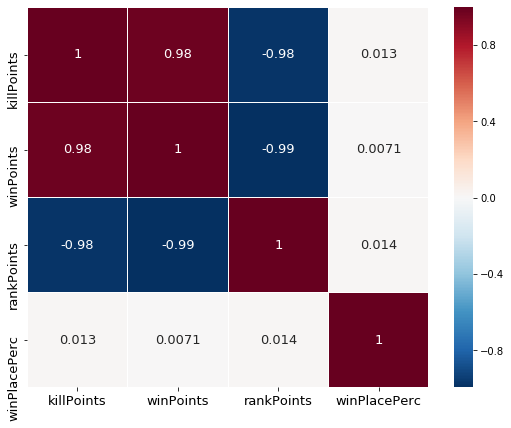

In [20]:
#Point features
correlation_features=["killPoints","winPoints","rankPoints","winPlacePerc"]
correlation_between_features = data[correlation_features].corr()
plt.figure(figsize=(9,7))
f,ax=plt.subplots(figsize = (9, 7))
sns.heatmap(
    correlation_between_features,
    annot=True,
    annot_kws={'size': 13},
    xticklabels=correlation_between_features.columns.values,
    yticklabels=correlation_between_features.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu_r"
)
ax.tick_params(axis='y',labelsize=13)
ax.tick_params(axis='x',labelsize=13)
plt.show()

In [ ]:
# Summary:important features:"boosts","damageDealt","killPlace","kills","killStreaks","longestKill" ,"walkDistance" ,"weaponsAcquired"

# 2.Find Outliers

### 2.1 Obvious outliers

In [35]:
# Too much lost imformation
data['gap']=data["maxPlace"]-data["numGroups"]
data.drop(data[data['gap']>data["maxPlace"]*0.5].index,inplace=True)

In [37]:
# Kill without moving
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
data['killsWithoutMoving'] = ((data['kills'] > 1) & (data['totalDistance'] == 0))
data.drop(data[data['killsWithoutMoving']==True].index,inplace=True)

In [41]:
#Find outliers according to important features.(IQR)
from collections import Counter
outlier_indices = []   
    # iterate over features(columns)
features=["boosts","heals","damageDealt","killPlace","kills","killStreaks","longestKill" ,"walkDistance" ,"weaponsAcquired"]
y=data[["winPlacePerc"]]
for col in features:
        # 1st quartile (25%)
    Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
    Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
    IQR = Q3 - Q1       
        # outlier step
    outlier_step = 1.5 * IQR       
        # Determine a list of indices of outliers for feature col
    outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index      
        # append the found outlier indices for col to the list of outlier indices 
    outlier_indices.extend(outlier_list_col)     
    # select observations containing more than 5 outliers
outlier_indices = Counter(outlier_indices)        
multiple_outliers = list( k for k, v in outlier_indices.items() if v >5 )  
print(len(multiple_outliers) )
print(data.loc[multiple_outliers])  
data.drop(data.loc[multiple_outliers].index,inplace=1)

536
                     Id         groupId         matchId  assists  boosts  \
20224    bfb7b73781ba88  b0b37d1324f880  4de59b5060687e        5       6   
40378    aca9f6a2c9df3b  fa8cc4b0629483  8b44a07c9ad145        0       7   
42154    0d86d0422cc3d4  28c84a3a61bd48  7b2e51436ac07b        3       6   
56564    4489c3cab749f0  d15388015753e2  057dce8c06cae5        0       6   
59072    7fe8885d450781  a96507dd3b221a  2361c35b80d784        2       8   
69566    dba714acdcc1ab  14fc78abd1ecd6  4d87dae5906533        3       6   
79589    cd665df7e14ee2  9e6e8968ee5aa5  89f9028923ca6a        1       6   
94739    ce405f7f65e3d5  d0fb5d34961ba6  e7351dcf720ada        1       6   
101644   31b5b223bcbbd3  e997a20b5185a5  d52338a271d3f6        2       7   
110499   180dcb05af584f  c8c5b2ee17b9c1  d5d6f297c30233        1       7   
119739   e5eb5ca8e77fe4  0b10ea189cc0f3  d393223e7edc97        2       8   
121202   637b7c0c081106  1d410badb21185  423c77f4a8f8ca        0       6   
134189  

ValueError: For argument "inplace" expected type bool, received type int.

In [43]:
data.shape

(4437953, 32)

In [45]:
data.to_csv(r'D:\pubg data\train(v1).csv')